# 网格模块进阶

## 一、网格常用接口

### 1. 网格对象构造与可视化

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fealpy.mesh import TriangleMesh
node = np.array([
    [0, 0],  # 0
    [1, 0],  # 1
    [1, 1],  # 2
    [0, 1]], # 3
    dtype=np.float64)

cell = np.array([
    [1, 2, 0],  # 0
    [3, 0, 2]], # 1
    dtype=np.int_)
mesh = TriangleMesh(node, cell)

fig, axes = plt.subplots()
mesh.add_plot(axes, cellcolor='g')
mesh.find_node(axes, showindex=True,
              color='r', marker='o', fontsize=15, fontcolor='r')
mesh.find_edge(axes, showindex=True,
              color='b', marker='v', fontsize=20, fontcolor='b')
mesh.find_cell(axes, showindex=True,
              color='k', marker='s', fontsize=25, fontcolor='k')
plt.show()

### 2. 获取网格实体数组及相关几何信息

* 获取实体数组与计数

In [ ]:
import matplotlib.pyplot as plt
from fealpy.mesh import TriangleMesh
mesh = TriangleMesh.from_box([0, 1, 0, 1], nx=1, ny=1)

node = mesh.entity('node') # (NN, GD)
edge = mesh.entity('edge') # (NE, 2)
face = mesh.entity('face') # (NF, 2)
cell = mesh.entity('cell') # (NC, 3)

NN = mesh.number_of_nodes()
NE = mesh.number_of_edges()
NF = mesh.number_of_faces()
NC = mesh.number_of_cells()

> 注意，`mesh` 会基于 cell 数组自动生成 `edge` 或 `face` 数组
> 区域边界上的 edge 或 face 定向约定为**其法向指向区域外部**

* 获取实体的重心

In [ ]:
bc = mesh.entity_barycenter('cell')
be = mesh.entity_barycenter('edge')

* 获取切向和法向
> 在一些向量、张量有限元构造以及边界条件处理里需要这些信息

In [ ]:
t = mesh.edge_tangent() # (NE, 2)
n = mesh.edge_normal() # (NE, 2)

ut = mesh.edge_unit_tangent()
un = mesh.edge_unit_normal()

* 获取网格实体测度

In [5]:
h = mesh.entity_measure('edge')
area = mesh.entity_measure('cell')
qf = mesh.integrator(3)

### 3. 获取网格实体的拓扑关系

In [1]:
import matplotlib.pyplot as plt
from fealpy.mesh import TriangleMesh
mesh = TriangleMesh.from_box([0, 1, 0, 1], nx=1, ny=1)

NE = mesh.number_of_edges()
edge2cell = mesh.ds.edge_to_cell()
fig, axes = plt.subplots()
mesh.add_plot(axes, cellcolor='g')
mesh.find_node(axes, showindex=True,
              color='r', marker='o', fontsize=15, fontcolor='r')
mesh.find_edge(axes, showindex=True,
              color='b', marker='v', fontsize=17, fontcolor='b')
mesh.find_cell(axes, showindex=True,
              color='k', marker='s', fontsize=19, fontcolor='k')
print('edge2cell:\n', edge2cell)

* `face2cell[i, 0]` 第 `i` 条边的左边单元全局编号
* `face2cell[i, 1]` 第 `i` 条边的右边单元全局编号
* `face2cell[i, 2]` 第 `i` 条边在左边单元中的局部编号
* `face2cell[i, 3]` 第 `i` 条边在右边单元中的局部编号
* 如果第 `i` 条边是边界边，则 
    - `face2cell[i, 0] == face2cell[i, 1]`
    - `face2cell[i, 2] == face2cell[i, 3]`

In [ ]:
cell2edge = mesh.ds.cell_to_edge()
node2node = mesh.ds.node_to_node()
node2cell = mesh.ds.node_to_cell()
cell2cell = mesh.ds.cell_to_cell()

### 4. 获取网格边界标记

* 各种数值离散方法经常需要获取边界上的网格实体

In [ ]:
isBdNode = mesh.ds.boundary_node_flag()
isBdEdge = mesh.ds.boundary_edge_flag()
isBdFace = mesh.ds.boundary_face_flag()
isBdCell = mesh.ds.boundary_cell_flag()
nidx = mesh.ds.boundary_node_index()
eidx = mesh.ds.boundary_edge_index()
fidx = mesh.ds.boundary_face_index()
cidx = mesh.ds.boundary_cell_index()

### 5. 网格插值点管理

In [8]:
import matplotlib.pyplot as plt
from fealpy.mesh import TriangleMesh
mesh = TriangleMesh.from_box([0, 1, 0, 1], nx=1, ny=1)
p = 3
ipoint = mesh.interpolation_points(p) # p 次插值点的坐标
cell2ipoint = mesh.cell_to_ipoint(p)  # 单元到 p 次插值点的映射矩阵
edge2ipoint = mesh.edge_to_ipoint(p) 
np = mesh.number_of_local_ipoints(p)  # 矩阵插值点的个数
NP = mesh.number_of_global_ipoints(p) # 全局插值点的个数
fig, axes= plt.subplots()
mesh.add_plot(axes)
mesh.find_node(axes, node=ipoint, showindex=True)
print('局部插值点个数：', np)
print('全局插值点个数：', NP)
print('cell2ipoint = \n', cell2ipoint)

## 二、网格生成示例

### 均匀笛卡尔网格 

* 一维均匀网格 `UniformMesh1d`

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh import UniformMesh1d

domain = [0.0, 1.0]
nx = 5
hx = (domain[1] - domain[0])/nx
mesh = UniformMesh1d([0, nx], h=hx, origin=domain[0])
node = mesh.entity('node')
cell = mesh.entity('cell')
fig, axes = plt.subplots()
mesh.add_plot(axes)
mesh.find_node(axes, showindex=True)
mesh.find_cell(axes, showindex=True)
plt.show()

* 二维均匀网格 UniformMesh2d

In [14]:
from fealpy.mesh import UniformMesh2d
domain = [0.0, 1.0, 0.0, 1.0]
nx = 5
ny = 5
hx = (domain[1] - domain[0])/nx
hy = (domain[3] - domain[2])/ny
mesh = UniformMesh2d(
    [0, nx, 0, ny], 
    h=(hx, hy), 
    origin=(domain[0], domain[2]))
fig, axes = plt.subplots()
mesh.add_plot(axes)
mesh.find_node(axes, showindex=True)
mesh.find_cell(axes, showindex=True)
plt.show()

* 三维均匀网格

In [15]:
from fealpy.mesh import UniformMesh3d
from mpl_toolkits.mplot3d import Axes3D

domain = [0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
nx = 5
ny = 5
nz = 5
hx = (domain[1] - domain[0])/nx
hy = (domain[3] - domain[2])/ny
hz = (domain[5] - domain[4])/nz
mesh = UniformMesh3d(
    [0, nx, 0, ny, 0, nz], 
    h=(hx, hy, hz), 
    origin=(domain[0], domain[2], domain[3]))
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
mesh.add_plot(axes)
plt.show()

### 一维区间网格

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh import IntervalMesh

node = np.array([[0], [0.5], [1]], dtype=np.float64) # (NN, 1) array
cell = np.array([[0, 1], [1, 2]], dtype=np.int_) # (NN, 2) array
mesh = IntervalMesh(node, cell)
mesh.uniform_refine(n=2)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, showindex=True)
mesh.find_cell(axes, showindex=True)
plt.show()

`IntervalMesh` 可以表示嵌入到高维空间的一维网格，如：

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh import IntervalMesh

node = np.array([
    [0.0, 0.0],
    [1.0, 0.0],
    [1.0, 1.0],
    [0.0, 1.0]], dtype=np.float64) # (NN, 2)
cell = np.array([
    [0, 1], [1, 2], [2, 3], [3, 0]
], dtype=np.int_) # (NC, 2) array

mesh = IntervalMesh(node, cell)
mesh.uniform_refine(n=2)
mesh.entity('node')
l = mesh.entity_measure('node')
bc = mesh.entity_barycenter('cell')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, showindex=True)
mesh.find_cell(axes, showindex=True)
plt.show()

### 非结构三角形网格 TriangleMesh

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh import TriangleMesh

i = 4
if i == 0:
    mesh = TriangleMesh.from_one_triangle(meshtype='equ')
    mesh.uniform_refine(n=3)

if i == 1:
    mesh = TriangleMesh.from_unit_square(nx=5, ny=5)

if i == 2:
    def threshold(p):
        x = p[..., 0]
        y = p[..., 1]
        return (x > 0.0) & (y < 0.0)
    mesh = TriangleMesh.from_box(box=[-1, 1, -1, 1], 
                                 threshold=threshold)
if i == 3:
    mesh = TriangleMesh.from_unit_circle_gmsh(0.1)

if i == 4:
    vertices = np.array([(0, 0), (1, 0), (0.5, 1)])
    h = 0.1
    mesh = TriangleMesh.from_polygon_gmsh(vertices, h)

node = mesh.entity('node')
edge = mesh.entity('edge')
cell = mesh.entity('cell')

n = mesh.face_unit_normal()

edge2cell = mesh.ds.edge_to_cell()

area = mesh.entity_measure('cell')
bc = mesh.entity_barycenter('cell')
c = mesh.circumcenter()

fig, axes = plt.subplots()
mesh.add_plot(axes)
plt.show()

下面给出基于 distmesh 算法生成三角形网格的示例。

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.geometry import LShapeDomain, CircleDomain
from fealpy.mesh import TriangleMesh

i = 1
if i == 0:
    domain = LShapeDomain()
    hmin = 0.1

if i == 1:
    hmin = 0.05
    hmax = .2
    def sizing_function(p, *args):
        fd = args[0]
        x = p[:, 0]
        y = p[:, 1]
        h = hmin + np.abs(fd(p))*0.1
        h[h>hmax] = hmax 
        return h
    domain = CircleDomain(fh=sizing_function)
    
mesh = TriangleMesh.from_domain_distmesh(
    domain, hmin, maxit=100)
fig, axes = plt.subplots()
mesh.add_plot(axes)
plt.show()

`TriangleMesh` 可以表示嵌入到三维空间的三角形网格

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fealpy.mesh import TriangleMesh

i = 1
if i == 0:
    mesh = TriangleMesh.from_torus_surface(5, 1, 30, 30)
elif i == 1:
    mesh = TriangleMesh.from_unit_sphere_surface(refine=3)

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
mesh.add_plot(axes)
plt.show()

`TriangleMesh` 还提供了一此类方法，帮助用户理解三角形网格上的形函数

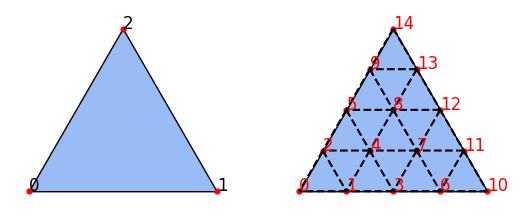

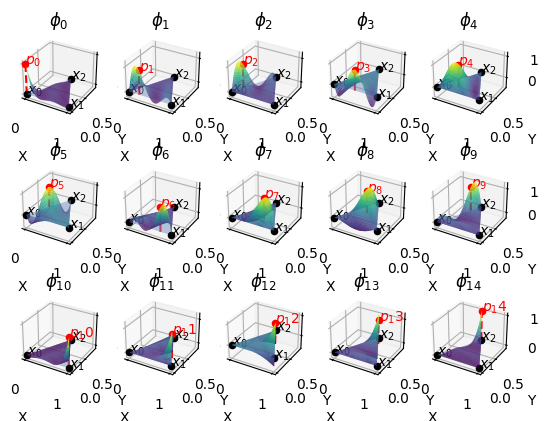

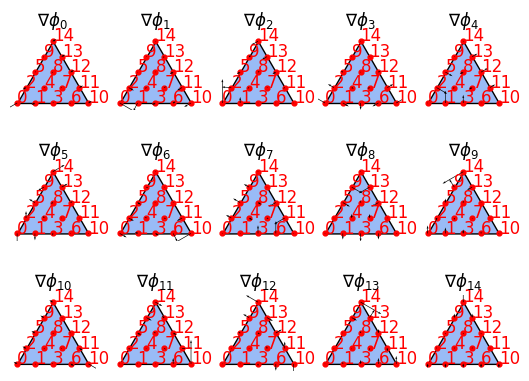

In [1]:
from fealpy.mesh import TriangleMesh    
TriangleMesh.show_lattice(4)
TriangleMesh.show_shape_function(4, funtype='L')
TriangleMesh.show_grad_shape_function(4, funtype='L')

### 四边形网格 QuadrangleMesh

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh import QuadrangleMesh

i = 1
if i == 0:
    mesh = QuadrangleMesh.from_one_quadrangle(meshtype='square')
elif i == 1:mesh = QuadrangleMesh.from_unit_square(
    nx=10, ny=10, threshold=None)


fig, axes = plt.subplots()
mesh.add_plot(axes)
mesh.find_node(axes)
mesh.find_cell(axes)
mesh.find_edge(axes)
plt.show()

### 多边形网格

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh import PolygonMesh, TriangleMesh

i = 4
if i == 0:
    mesh = PolygonMesh.from_one_triangle(meshtype='iso')
elif i == 1:
    mesh = PolygonMesh.from_one_square()
elif i == 2:
    mesh = PolygonMesh.from_one_pentagon()
elif i == 3:
    mesh = PolygonMesh.from_one_hexagon()
elif i == 4:
    vertices = np.array([(0, 0), (1, 0), (0.5, 1)])
    h = 0.1
    tmesh = TriangleMesh.from_polygon_gmsh(vertices, h)
    mesh = PolygonMesh.from_triangle_mesh_by_dual(tmesh, bc=True)

fig, axes = plt.subplots()
mesh.add_plot(axes, cellcolor=[0.5, 0.9, 0.45], edgecolor='k')
plt.show()

### 四面体网格 TetrahedronMesh

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fealpy.mesh import TetrahedronMesh

i = 0
if i == 0:
    mesh = TetrahedronMesh.from_one_tetrahedron(meshtype='equ')

if i == 1:
    mesh = TetrahedronMesh.from_cylinder_gmsh(1, 5, 0.1)

if i == 2:
    points = np.array([
        (0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 1, 0),
        (0, 0, 1), (1, 0, 1), (1, 1, 1), (0, 1, 1),
        ])

    facets = np.array([
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [0, 4, 5, 1],
        [1, 5, 6, 2],
        [2, 6, 7, 3],
        [3, 7, 4, 0],
        ])   
    mesh = TetrahedronMesh.from_meshpy(points, facets, 0.2)

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
mesh.add_plot(axes)
plt.show()

### 六面体网格

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fealpy.mesh import TetrahedronMesh
from fealpy.mesh import HexahedronMesh

i = 1

if i==0:
    def threshold(p):
        x = p[..., 0]
        y = p[..., 1]
        z = p[..., 2]
        return (x > 0.0) & (y < 0.0) & (z > 0.0)
    box = [-1, 1, -1, 1, -1, 1]
    mesh = HexahedronMesh.from_box(
        box=box, nx=10, ny=10, nz=10, threshold=threshold)
    
if i==1:
    tmesh = TetrahedronMesh.from_one_tetrahedron(meshtype='equ')
    mesh = HexahedronMesh.from_tetrahedron_mesh(tmesh)
    
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
mesh.add_plot(axes)
plt.show()

### 一维单元网格 EdgeMesh 

在实际应用中有很多力学结构是由一维单元组成的，如梁、桁架、框架等。在 FEALPy 中对应的网格类型为 `EdgeMesh`.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fealpy.mesh import EdgeMesh

mesh = EdgeMesh.from_tower()

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
mesh.add_plot(axes)
plt.show()